# Gold Price Forecast based on LSTM-CNN Model

In [317]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.preprocessing
import sklearn.model_selection
import tensorflow as tf

In [318]:
# Load dataset
# df = pd.read_csv("/Users/luke/Desktop/美赛/MCM-ICM-2022/2022_Problem_C_DATA/BCHAIN-MKPRU.csv")
df = pd.read_csv("/Users/luke/Desktop/美赛/MCM-ICM-2022/2022_Problem_C_DATA/LBMA-GOLD.csv")

In [319]:
# Model settings
alpha = 7   # window length
beta = 3    # the number of LSTM layers
gamma = 64  # the number of filters in convolutional layer

In [320]:
prices = df['USD (PM)'].tolist()
# prices = df['Value'].tolist()
prices = prices[50:365*2]

# Split data
training_ratio = 0.8
n_train = int(len(prices) * training_ratio)
n_test = len(prices) - n_train

train_prices = np.array(prices[:n_train]).reshape((-1, 1))
test_prices = np.array(prices[n_train:n_train+n_test]).reshape((-1, 1))

# Standardize data
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train_prices)
train_prices = scaler.transform(train_prices).reshape(-1)
test_prices = scaler.transform(test_prices).reshape(-1)

print("train_prices.shape:", train_prices.shape)
print("test_prices.shape:", test_prices.shape)

train_prices.shape: (504,)
test_prices.shape: (126,)


In [321]:
# make train dataset
X_train = []
y_train = []
for i in range(len(train_prices)-alpha):
    X_train.append(train_prices[i:i+alpha].reshape((1, -1)))
    y_train.append(train_prices[i+alpha].reshape((1, -1)))  # next day's price
X_train = np.array(X_train, dtype='float32')
y_train = np.array(y_train, dtype='float32')

# make test dataset
X_test = []
y_test = []
for i in range(len(test_prices)-alpha):
    X_test.append(test_prices[i:i+alpha].reshape((1, -1)))
    y_test.append(test_prices[i+alpha].reshape((1, -1)))  # next day's price
X_test = np.array(X_test, dtype='float32')
y_test = np.array(y_test, dtype='float32')

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (497, 1, 7)
y_train.shape: (497, 1, 1)
X_test.shape: (119, 1, 7)
y_test.shape: (119, 1, 1)


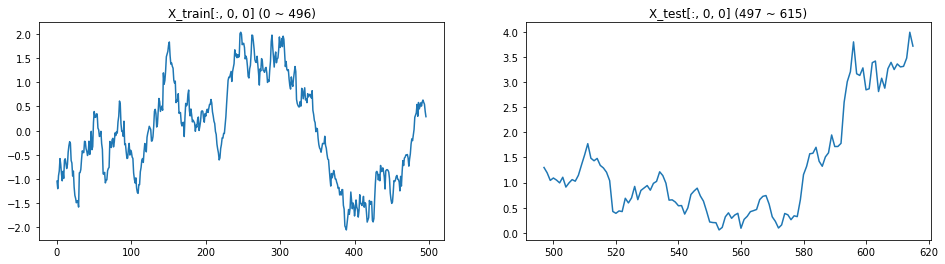

In [322]:
# Plot dataset
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.title("X_train[:, 0, 0] (%d ~ %d)" % (0, len(X_train)-1))
sns.lineplot(x=np.arange(0, len(X_train)), y=X_train[:, 0, 0])

plt.subplot(122)
plt.title("X_test[:, 0, 0] (%d ~ %d)" % (len(X_train), len(X_train)+len(X_test)-1))
sns.lineplot(x=np.arange(len(X_train), len(X_train)+len(X_test)), y=X_test[:, 0, 0])
plt.show()

In [323]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(alpha, input_shape=(1, alpha), return_sequences=True) for _ in range(beta)
] + [
    # attention.Attention(),
    tf.keras.layers.Dense(alpha, activation='linear'),
    tf.keras.layers.Reshape((1, alpha)),
    tf.keras.layers.Conv1D(filters=gamma, kernel_size=1, strides=1),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding='same'),
    tf.keras.layers.Dense(alpha, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])
# model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='mse')
# model.compile(optimizer='SGD', loss='mse', learning_rate = 0.00001)
history = model.fit(X_train, y_train, batch_size=128, epochs=80)

Epoch 1/80


2022-02-19 14:48:11.459140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:48:11.749654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:48:11.800035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:48:11.850298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:48:12.018677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-19 14:48:12.122726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/4 [==============>...............] - ETA: 0s - loss: nan   

2022-02-19 14:48:12.226284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 3s 95ms/step - loss: nan
Epoch 2/80
4/4 [==============================] - 0s 43ms/step - loss: nan
Epoch 3/80
4/4 [==============================] - 0s 29ms/step - loss: nan
Epoch 4/80
4/4 [==============================] - 0s 27ms/step - loss: nan
Epoch 5/80
4/4 [==============================] - 0s 19ms/step - loss: nan
Epoch 6/80
4/4 [==============================] - 0s 19ms/step - loss: nan
Epoch 7/80
4/4 [==============================] - 0s 20ms/step - loss: nan
Epoch 8/80
4/4 [==============================] - 0s 25ms/step - loss: nan
Epoch 9/80
4/4 [==============================] - 0s 20ms/step - loss: nan
Epoch 10/80
4/4 [==============================] - 0s 23ms/step - loss: nan
Epoch 11/80
4/4 [==============================] - 0s 20ms/step - loss: nan
Epoch 12/80
4/4 [==============================] - 0s 21ms/step - loss: nan
Epoch 13/80
4/4 [==============================] - 0s 19ms/step - loss: nan
Epoch 14/80
4/4 [===============

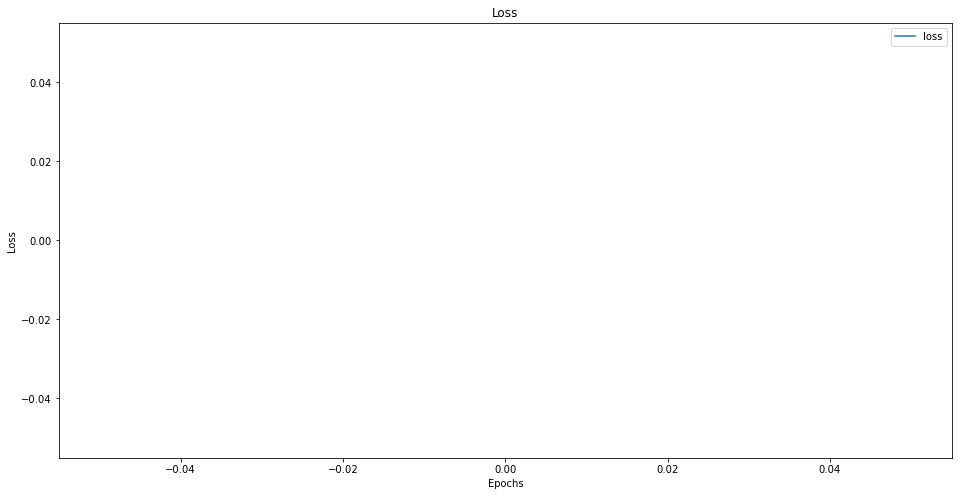

In [324]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=history.history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

In [325]:
preds = model.predict(X_test)

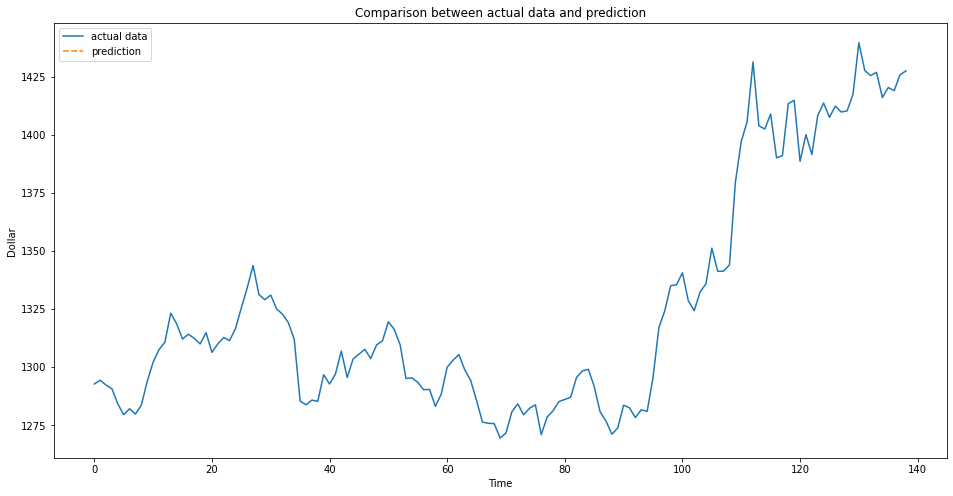

In [ ]:
plt.figure(figsize=(16, 8))
sns.lineplot(data={
    "actual data": scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1),
    "prediction": scaler.inverse_transform(preds.reshape(-1, 1)).reshape(-1),
})
plt.title("Comparison between actual data and prediction")
plt.xlabel("Time")
plt.ylabel("Dollar")
plt.show()